In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 
import seaborn as sns
import sys 

from data import * 


In [3]:
data_path = '/Users/ivan_zorin/Documents/AIRI/data/batt/' # change the path 
# LSQ B-Spline approximation 
hi_approximator = SplineApproximator
hi_approximator_kwargs = {'degree': 3, 'knot_step': 100}
# dataset init
dataset = BattData(data_path, 'batt_data.pkl', hi_approximator=hi_approximator, hi_approximator_kwargs=hi_approximator_kwargs,  is_save_data=False)

data loaded from pickle file
start building dataset


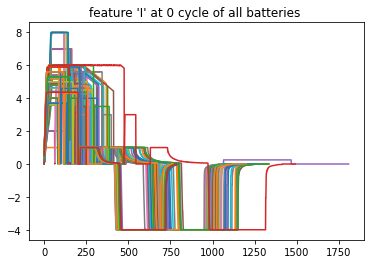

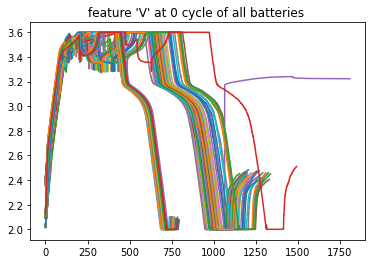

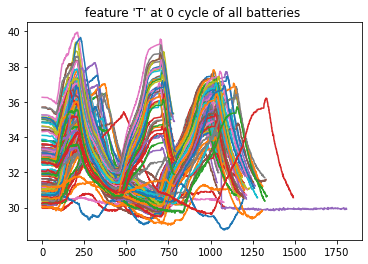

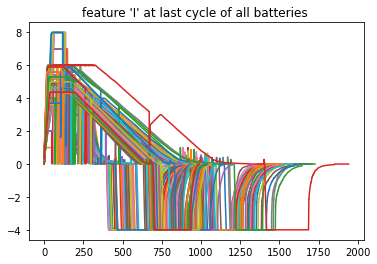

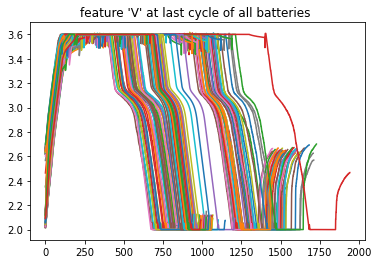

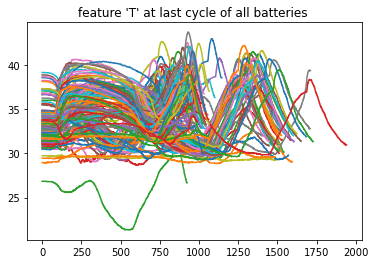

In [41]:
# one feature for all batteries 


def plot_feature_of_all(dataset, feature_name = 'I', cycle_num = 0, save=False, save_path=None):
    fig = plt.figure()

    for batt in dataset.batt_names:
        idx = dataset.batt_to_idxs[batt][cycle_num]
        feat = dataset[idx][-1][feature_name]
        plt.plot(dataset[idx][-1][feature_name], label=batt)

    # plt.legend()
    cycle_num = cycle_num if cycle_num != -1 else 'last'
    plt.title(f"feature '{feature_name}' at {cycle_num} cycle of all batteries ")
    plt.show()

    if save:
        fig.savefig(os.path.join(save_path, f'feature_{feature_name}_cycle_{cycle_num}.png'), format='png')



save_path = './pics/paper/'
plot_feature_of_all(dataset, feature_name='I', cycle_num=0, save=True, save_path=save_path)
plot_feature_of_all(dataset, feature_name='V', cycle_num=0, save=True, save_path=save_path)
plot_feature_of_all(dataset, feature_name='T', cycle_num=0, save=True, save_path=save_path)

plot_feature_of_all(dataset, feature_name='I', cycle_num=-1, save=True, save_path=save_path)
plot_feature_of_all(dataset, feature_name='V', cycle_num=-1, save=True, save_path=save_path)
plot_feature_of_all(dataset, feature_name='T', cycle_num=-1, save=True, save_path=save_path)



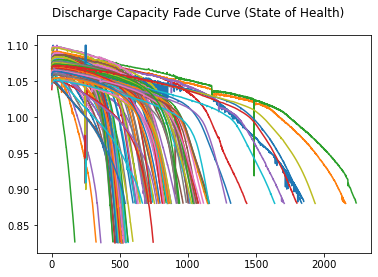

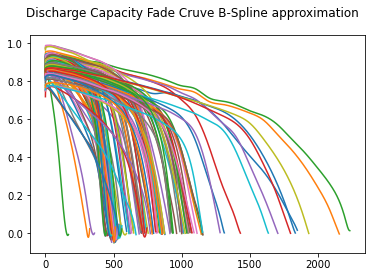

In [42]:
# SOH curves of all batteries 

save = True

fig1, ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)
for batt in dataset.batt_names:
    feat = dataset.batt_summary[batt]['QD']
    feat = np.clip(feat, a_min=0, a_max=1.1) # GT
    x = np.arange(len(feat))
    feat_approx = dataset.batt_fade_approx[batt]['QD'](x) # approximation

    ax1.plot(feat)
    ax2.plot(feat_approx)

fig1.suptitle('Discharge Capacity Fade Curve (State of Health)')
fig2.suptitle('Discharge Capacity Fade Cruve B-Spline approximation')

if save:
    fig1.savefig(os.path.join(save_path, 'soh_true.png'), fornat='png')
    fig2.savefig(os.path.join(save_path, 'soh_approx.png'), fornat='png')



In [51]:
dataset.REF_BAT

'b1c1'

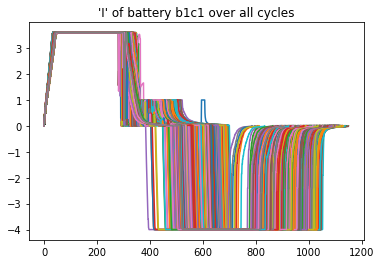

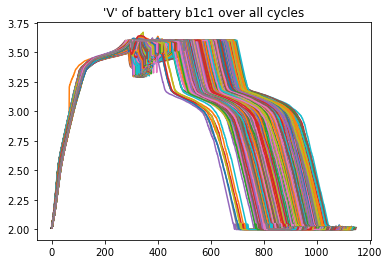

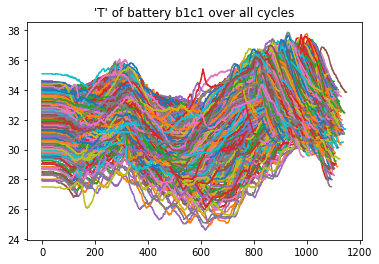

In [50]:
# features at all cycles of the ref battery

def plot_feature_over_all_cycles(batt = dataset.REF_BAT, feature_name = 'I', save=False, save_path=None):
    fig = plt.figure()
    for cycle in dataset.batt_to_idxs[batt]:
        feat = dataset[cycle][-1][feature_name]
        plt.plot(feat)

    plt.title(f"'{feature_name}' of battery {batt} over all cycles")
    plt.show()
    if save:
        fig.savefig(os.path.join(save_path, f'{feature_name}_{batt}_all_cycles.png'), format='png')


batt = dataset.REF_BAT
save_path = './pics/paper/'
save = True
plot_feature_over_all_cycles(batt, feature_name='I', save=save, save_path=save_path)
plot_feature_over_all_cycles(batt, feature_name='V', save=save, save_path=save_path)
plot_feature_over_all_cycles(batt, feature_name='T', save=save, save_path=save_path)


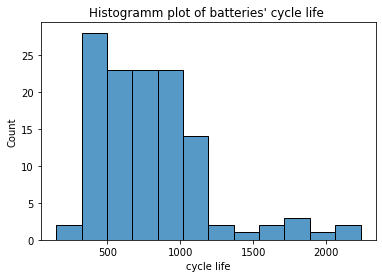

In [10]:
cycle_lifes = np.array([cycle for cycle in dataset.batt_life_cycles.values()])
# cycle_lifes_known = cycle_lifes[~np.isnan(cycle_lifes)]

plt.figure()
sns.histplot(cycle_lifes)
plt.xlabel('cycle life')
plt.title("Histogramm plot of batteries' cycle life ")
plt.show()